# Clean and Analyze Employee Exit Surveys
## 1 - Introduction

In this project, we will be looking at exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we will play the role of data analyst and pretend our stakeholders want to know the following:
    
1) Are employees who only worked for the institutes for a short period of time resigining due to some kind of dissatisfaction? What about employees who have been there longer?
    
2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [1]:
#import libraries
import pandas as pd
import numpy as np
#read csv files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Before we can begin answering our intial questions, we will need to conduct thorough data cleaning on both survey datasets.

### 1.1 - DETE Survey Exploration

In [2]:
#Show the dimemnsions of the dataset
dete_survey.shape

(822, 56)

In [3]:
#Show dataset information
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
#Show the first 5 entries
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
#Show the number of null entries in each column
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### 1.2 - TAFE Survey Exploration

In [6]:
#Show the dimemnsions of the dataset
tafe_survey.shape

(702, 72)

In [7]:
#Show the dataset info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [8]:
#Show the first 5 entries
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
#Show the total number of null entries in each column
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Upon inspection, the DETE survey has a size of (822,56) and the TAFE survey has a size of (702,72). The DETE and TAFE survey have differing questionare styles which will introduce complications when merging the two datasets. Additionally, some of the column names in the TAFE survey are labelled as full questions. This will need to be relabelled to match columns found in the DETE survey which follow a more concise/simpler naming configuration. There are columns in both surveys that are not required in identifying factors in dissatisfaction. Note that in the DETE survey dataframe, 'Not Stated' indicates values that are missing, but they arent represented as NaN. We will want to alter this so that 'Not Stated' entries are seen as NaN. We will tackle this problem in the next step. 

## 2 - Identify Missing Values and Drop Unnecessary Columns

We identified that there in the DETE survey dataframe, 'Not Stated' indicates values that are missing, but they arent represented as NaN. To solve this, we can read in the dete_survey.csv file and pass a parameter to solve this issue. 

In [10]:
#Read in DETE survey with 'Not Stated' values mapped to NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Our initial exploration showed that there is a lot of information in the datasets in which we will not need for our analysis. Removing these columns will make the dataframes much easier to work with.

In [11]:
#Remove columns 29 to 50 from DETE survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [12]:
#Remove columns 18 to 67 from TAFE survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## 3 - Clean Column Names

Next we will begin looking at standardizing column names as we will eventually want to combine the two datasets. We will want the column names to follow the following criteria:

    1)Make all capitilization lowercase
    2)Remove any trailing whitespace from the end of the strings
    3)Replace spaces with underscores

### 3.1 - DETE Survey Columns

In [13]:
#Show column names
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [14]:
#Rename columns using vectorized string methods
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.rstrip()

In [15]:
#Show updated column names
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

### 3.2 - DETE Survey Columns

In [16]:
#Show column names
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [17]:
#Create mapping of column names 
mapping = {'Record ID': 'id',
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype', 
           'Gender. What is your Gender?': 'gender', 
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }
#Update column names using vectroized method
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

In [18]:
#Show column names
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## 4 - Filter the Data

Referring back to our initial questions, we will want to only look at employees who's reason of leaving the company was due to resignation. Thus, we can begin filter the datasets to only show employees who have resigned. This will be found in the 'seperationtype' column in both datasets.

In [19]:
#Show seperationtype values and their count
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
#Show seperationtype values and their count
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Note that in the DETE survey, there are three options of resignation to classify employees. We will include all three types. We can alter these value names by removing the '-'.

In [21]:
#Change entry name to get rid of '-'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

#Create a deep copy of the surveys filtering out only resignations
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## 5 - Verify the Data

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies. We will begin by focusing on verifying that the years in the cease_date and dete_start_date columns make sense. We shouldn't have a start date past the cease_date and that start dates do not begin too early i.e. past 1940.

### 5.1 - DETE Survey Data Verification

In [22]:
#Show the column's values and the count
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [23]:
#Use vectorized string methods to retrieve the year only
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
#Convert object type to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')


In [24]:
#Show the column's values and the count
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [25]:
#Show the column's values and the count sorted in ascending order
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

### 5.2 - TAFE Survey Data Verification

In [26]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Analysis of these columns in both surveys show that the cease dates do not match. The TAFE survey has cease dates in the year 2009 whilst the DETE survey does not. The TAFE survey also has more entries for the year 2010 as compared to DETE. As we are not interested in the particular year that employees left, this does not matter.
We will probably need to find the difference between the start and cease date to find the duration of an employee at the company which will help in answering our initial questions.


## 6 - Create a New Column

In the TAFE survey dataset, there is a years of service column called 'institute_service'. Since we will be merging the two datasets, we will make a similar column in the DETE survey dataset.


In [27]:
#Show the column's values and the count
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [28]:
#Create a new column to using the difference between cease_date and dete_start_date to get an employee's years of service
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [29]:
#Show the column's values and the count sorted in ascending order
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We now have a new column that shows the duration of an employee at the company. We may need to group the new column into range groups as seen in the TAFE survey.


## 7 - Identify Dissatisfied Employees


Now that we have filtered our datsets to only show those who have resigned, we can go ahead and identify those employees who have resigned to due some type of dissatisfaction. The following is a list of factors in each survey in which we will examine to determine whether an employee was dissatisfied. 

TAFE Survey
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

DETE survey

* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_enviroment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

If any of the employees indicate any of the factors were the cause for them to resign, we will mark them as dissatisfied in a new column.

### 7.1 - Determining Dissatisfaction in TAFE Survey

In [30]:
# Update the values in the contributing factors to be True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
#Apply function to create column 
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Job Dissatisfaction','Contributing Factors. Dissatisfaction']].applymap(update_vals).any(1,skipna = False)
#Create a deep copy, a copy of the calling object’s data and indices
tafe_resignations_up = tafe_resignations.copy()
#Check values of dissatisfied column
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

### 7.2 - Determining Dissatisfaction in DETE Survey

In [31]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
#Create a deep copy
dete_resignations_up = dete_resignations.copy()
#Check values of dissatisfied column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    184
True     127
Name: dissatisfied, dtype: int64

## 8 - Combine the Data
We have reached the stage in which we can merge the two datasets to aggregate the data and use it in our analysis. 

In [32]:
#Create a new column to distinguis between the origin of data (DETE or TAFE)
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
#Merge the two datasets ignoring the index
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index = True)
#Show the sum of non null values in the combined
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In [33]:
#Drop the columns that have less than 500 non null values
combined_updated = combined.dropna(axis = 1, thresh = 500).copy()

## 9 - Clean the Service Column
Going back to the institute_service column again, we noticed that the data is represnted in a few different ways. We will base our analysis in a different way, arguing that understanding employee's needs will be more effective if we look at their career stage on not their age. The following is a modified definition of our years of service column:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Hence, we will recategorize our institute_service column based on this new definition.

In [34]:
#Show the values and its count
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [35]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand = False)
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts(dropna = False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [36]:
#Function to categorize years of service 
def career_stage(years):
    if years >= 11:
        return "Veteran"
    elif 7 <= years < 11:
        return "Established"
    elif 3 <= years < 7:
        return "Experienced"
    elif pd.isnull(years):
        return np.nan
    else:
        return "New"
#Apply function to series
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)

In [37]:
#Show values and its count
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## 10 - Clean the Age Column

We will also be analysing the age column to see whether there is any distinction between younger and older employees. Upon inspection of the age column, the series requires some cleaning before the data can be aggregated for analysis. To solve this issue, we will group the ages in decade groupings. 

In [38]:
#Show values and its count
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [39]:
#Convert type to string and use vectorized string methods to pull the first numerical value from each string
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'(\d+)', expand = False)
combined_updated['age'] = combined_updated['age'].astype('float')
#Show values and its count
combined_updated['age'].value_counts(dropna = False).sort_index()

 20.0    10
 21.0    62
 26.0    67
 31.0    61
 36.0    73
 41.0    93
 46.0    81
 51.0    71
 56.0    55
 61.0    23
NaN      55
Name: age, dtype: int64

In [40]:
#Function to produce age groups
def age_group(age):
    if age < 20:
        return 'Under 20'
    elif 20 < age < 30:
        return '20-29'
    elif 30 < age < 40:
        return '30-39'
    elif 40 < age < 50:
        return '40-49'
    elif 50 < age < 60:
        return '50-59'
    elif pd.isnull(age):
        return np.nan
    else:
        return 'Over 60'
#Apply function
combined_updated['age'] = combined_updated['age'].apply(age_group) 

In [41]:
#Show values and its count
combined_updated['age'].value_counts(dropna = False).sort_index()

20-29      129
30-39      134
40-49      174
50-59      126
Over 60     33
NaN         55
Name: age, dtype: int64

There are still missing values in the age column. Considering that there are only 55 mising values and that this accoutns for only 8% of the dataset. I will be ignoring the missing values during my analysis.

## 11 - Perform Data Analysis


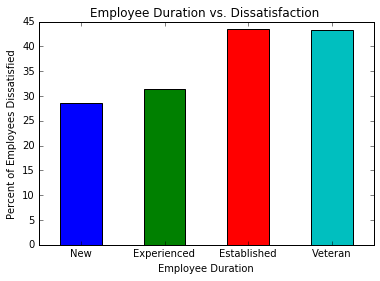

In [46]:
#Replace NaN values as False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
#Create pivot table
dis_pvt = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')
#Convert dissatisfied to percentage
dis_pvt = dis_pvt['dissatisfied']*100
#Reindex pivot table
dis_pvt = dis_pvt.reindex(['New','Experienced','Established','Veteran'])
%matplotlib inline
#Plot bar chart
ax = dis_pvt.plot(kind = 'bar',rot = 360)
ax.set_xlabel('Employee Duration')
ax.set_ylabel('Percent of Employees Dissatisfied')
ax.set_title('Employee Duration vs. Dissatisfaction ')

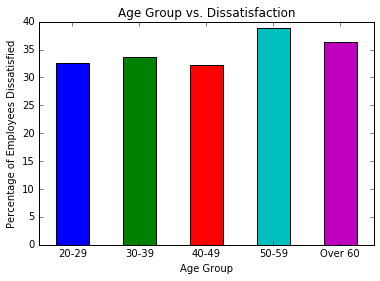

In [45]:
#Create pivot table
age_pvt = combined_updated.pivot_table(index = 'age', values = 'dissatisfied')
#Convert dissatisfied to percentage
age_pvt = age_pvt['dissatisfied']*100
#Plot bar chart
ax2 = age_pvt.plot(kind = 'bar', rot = 360)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Percentage of Employees Dissatisfied')
ax2.set_title('Age Group vs. Dissatisfaction')

## 12 - Initial Analysis Report

Let us look back at our initial inquiries into the dataset. We desired to answer the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

After performing signficant data cleaning on the datasets, we were able to aggregate the data in such a way that we can visualize the results of employee age and years of service on dissatisfaction rates found upon resignations. The appropriate finding

Our findings show that established and veteran employees are more likely to leave due to dissatisfaction, this being in regards to employees for more than 7 years. 44% of both established and veteran employees resigned compared to 32% and 28% of experienced and new employees respectively. I suspect that this could be due to more tenured employees desiring more in their career and the company unwilling to meet those needs. Newer employees will more likely stay with the company although their needs aren't met.

Across the age groups, there lacks any distinguishable age groups that show overwhelmingly more job dissatisfaction than any other group. This goes to show that age is not able to show a trend in dissatisfaction whilst the years of service is more of a reliable factor. 